In [50]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from collections import Counter

In [7]:
df=pd.read_csv('housing.csv')

In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [17]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [18]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [19]:
df.duplicated().sum()

0

Data visualition

In [38]:
def plotHistogram(column):
    """
        input: Column name
        output: Histogram plot
    """
    
    plt.figure()
    plt.hist(df[column], bins = 55, color = "orange")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Data Frequency - {column}")
    plt.show()

In [27]:
numerical_val=df.columns[2:-1]

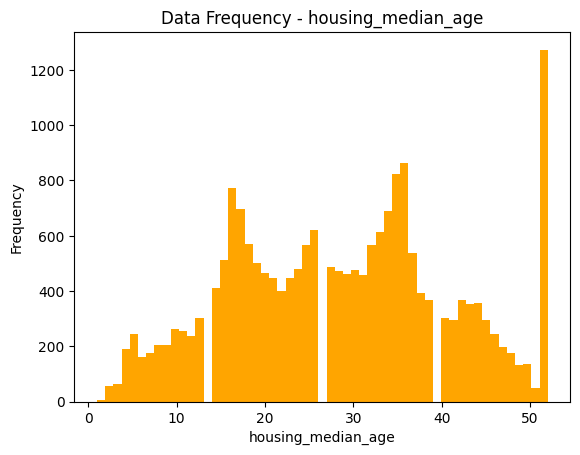

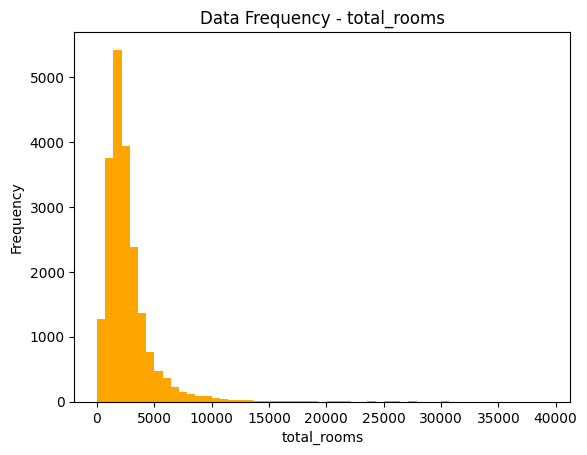

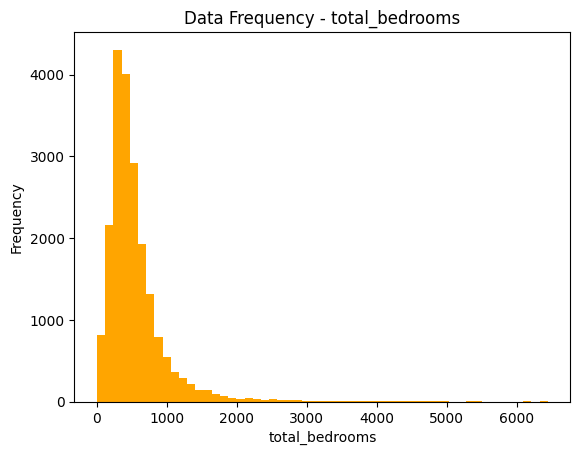

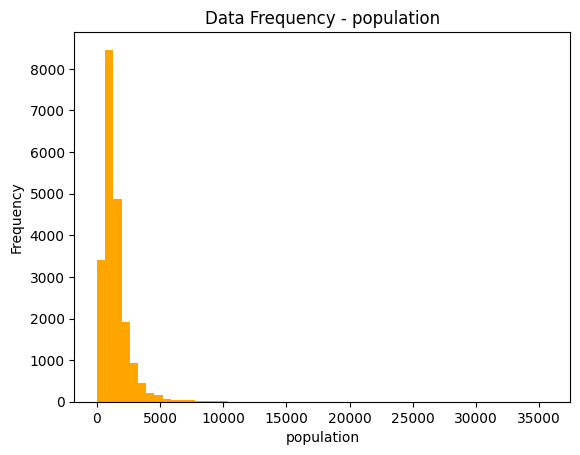

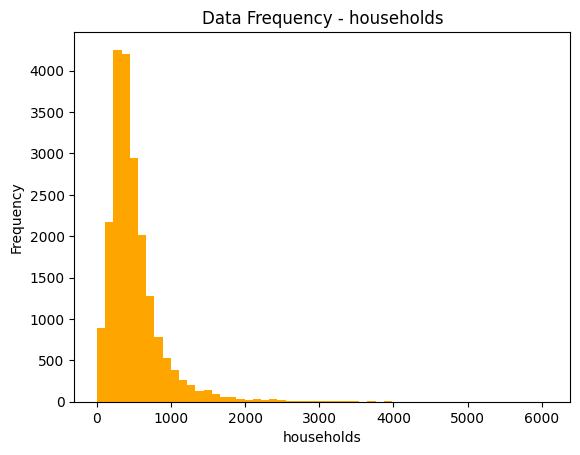

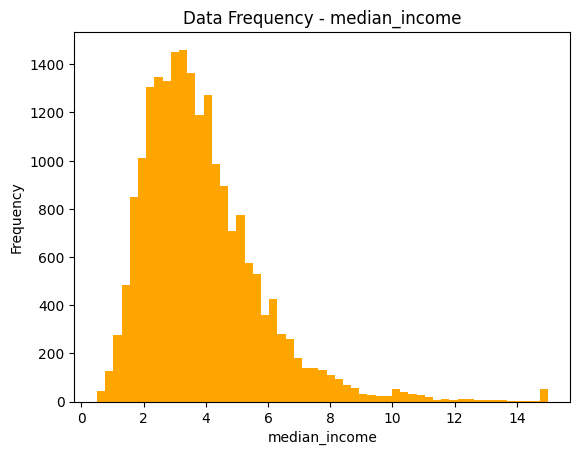

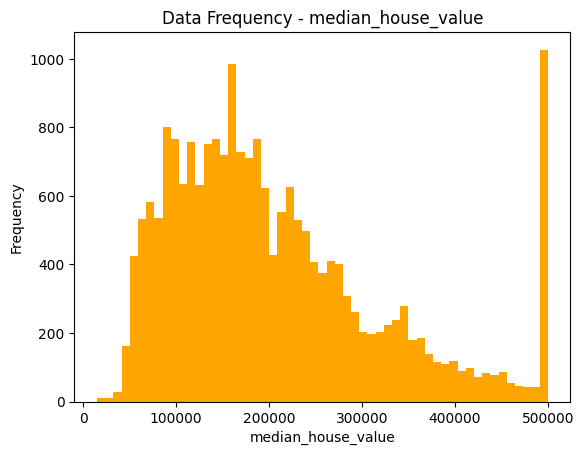

In [39]:
for i in numerical_val:
    plotHistogram(i)

<AxesSubplot: >

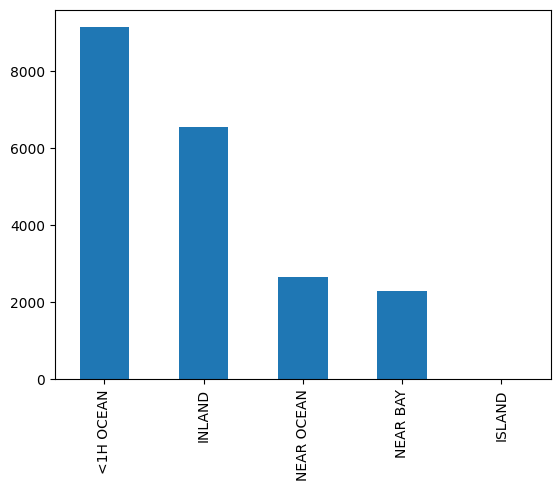

In [43]:
df['ocean_proximity'].value_counts().plot(kind='bar')

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(df['median_house_value'])
plt.show()

In [51]:
def anomalyDetection(df, columns):
    outlier_indices = []
    
    for c in columns:
        # first quartile
        Q1 = np.percentile(df[c],25)
        # third quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # multiplier for outlier detection
        outlier_step = IQR * 1.5
        # detect outlier and outlier index
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indexes
        outlier_indices.extend(outlier_list_col)
    
    # find unique outliers
    outlier_indices = Counter(outlier_indices)
    # if a sample (v) is outlier for 1 different column then treat it as outlier (v>1)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)
    
    return multiple_outliers

In [52]:
anomalyDetection(df,numerical_val)

[1,
 101,
 104,
 185,
 283,
 508,
 568,
 570,
 571,
 573,
 576,
 605,
 654,
 706,
 707,
 780,
 799,
 821,
 850,
 864,
 865,
 866,
 867,
 868,
 869,
 871,
 875,
 881,
 883,
 887,
 889,
 910,
 919,
 922,
 924,
 928,
 936,
 945,
 946,
 953,
 957,
 964,
 972,
 985,
 988,
 989,
 995,
 1004,
 1010,
 1015,
 1021,
 1053,
 1054,
 1055,
 1058,
 1059,
 1060,
 1074,
 1076,
 1086,
 1220,
 1244,
 1260,
 1261,
 1262,
 1277,
 1304,
 1354,
 1373,
 1380,
 1395,
 1399,
 1405,
 1477,
 1507,
 1508,
 1511,
 1514,
 1517,
 1524,
 1541,
 1556,
 1558,
 1560,
 1562,
 1568,
 1574,
 1575,
 1582,
 1585,
 1588,
 1589,
 1590,
 1593,
 1603,
 1607,
 1608,
 1622,
 1623,
 1636,
 1640,
 1642,
 1645,
 1678,
 1697,
 1700,
 1705,
 1710,
 1752,
 1930,
 1982,
 1984,
 2025,
 2115,
 2119,
 2122,
 2171,
 2240,
 2255,
 2267,
 2284,
 2292,
 2294,
 2299,
 2311,
 2312,
 2829,
 2830,
 2961,
 2963,
 2967,
 2975,
 2978,
 2995,
 2999,
 3001,
 3003,
 3004,
 3006,
 3008,
 3036,
 3134,
 3147,
 3149,
 3167,
 3177,
 3387,
 3388,
 3413,
 3451,